# Detectando y Analizando Outliers

In [ ]:
import pandas as pd

Hacemos primera una exploracion del archivo, rapida y  sin transformar nada.

In [198]:
file = '/mnt/lnxsasdtcn/sasdata/DISCO_M/ALZSeguros/FtpPCSas/Cierre_perspektive_31032021.csv'
df = pd.read_csv(file, sep=';')
df.head()

,Fecha,Fecha entrega,CIA,Ramo,Modalidad,DC,SUC,Agente,Nº Póliza (esp),Nº Póliza (ger),...,MAX RESCATE PARCIAL,SUMA RESCATES,CAP. FALLECIMIENTO FIN MES,CAPITAL MÍNIMO GARANTIZADO,RENTA MÍNIMA GARANTIZADA,POLIZAS_45,Motivo Cancelación AZS,IND_NP,CARTERA_SAP,IND_DIF
0,20210331,20210324,2,2295,166,0,0,9510278,46007338,5224622395,...,0,"000000000000000,0","000000000000000,0","000000000000000,0","000000000000000,0",0,0,0,640,0
1,20210331,20210324,2,2295,166,0,0,9510278,46007452,5224632000,...,0,"000000000000000,0","00000000049030,68","000000000049000,0","00000000000144,01",0,0,0,640,0
2,20210331,20210324,2,2295,166,0,0,9510278,46008015,5224691735,...,0,"000000000000000,0","000000000000000,0","000000000000000,0","000000000000000,0",0,0,0,640,0
3,20210331,20210324,2,2295,166,0,0,9510278,46008038,5224691670,...,0,"000000000000000,0","00000000049030,68","000000000049000,0","00000000000100,07",0,0,0,640,0
4,20210331,20210324,2,2295,166,0,0,9510278,46007160,5224596951,...,0,"000000000000000,0","00000000024515,34","000000000024500,0","00000000000040,53",0,0,0,640,0


Mas alla de ver el sampleo de datos podemos chequear los tipos de datos con dtypes o con info, vayramos por info:

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Fecha                        43 non-null     int64 
 1   Fecha entrega                43 non-null     int64 
 2   CIA                          43 non-null     int64 
 3   Ramo                         43 non-null     int64 
 4   Modalidad                    43 non-null     int64 
 5   DC                           43 non-null     int64 
 6   SUC                          43 non-null     int64 
 7   Agente                       43 non-null     int64 
 8   Nº Póliza (esp)              43 non-null     int64 
 9   Nº Póliza (ger)              43 non-null     int64 
 10  Account Manager              43 non-null     int64 
 11  Contract Phase               43 non-null     int64 
 12  Estado Póliza                43 non-null     object
 13  Motivo Cancelación (abs)     43 non-n

Segun parece arriba algunas campos no fuero interpretados como float o int segun vemos. Podemos volver a leer el df con el siguiente parametro:


In [199]:
df = pd.read_csv(file, sep=';', decimal=',')
df.head()

,Fecha,Fecha entrega,CIA,Ramo,Modalidad,DC,SUC,Agente,Nº Póliza (esp),Nº Póliza (ger),...,MAX RESCATE PARCIAL,SUMA RESCATES,CAP. FALLECIMIENTO FIN MES,CAPITAL MÍNIMO GARANTIZADO,RENTA MÍNIMA GARANTIZADA,POLIZAS_45,Motivo Cancelación AZS,IND_NP,CARTERA_SAP,IND_DIF
0,20210331,20210324,2,2295,166,0,0,9510278,46007338,5224622395,...,0,0.0,0.00,0.0,0.00,0,0,0,640,0
1,20210331,20210324,2,2295,166,0,0,9510278,46007452,5224632000,...,0,0.0,49030.68,49000.0,144.01,0,0,0,640,0
2,20210331,20210324,2,2295,166,0,0,9510278,46008015,5224691735,...,0,0.0,0.00,0.0,0.00,0,0,0,640,0
3,20210331,20210324,2,2295,166,0,0,9510278,46008038,5224691670,...,0,0.0,49030.68,49000.0,100.07,0,0,0,640,0
4,20210331,20210324,2,2295,166,0,0,9510278,46007160,5224596951,...,0,0.0,24515.34,24500.0,40.53,0,0,0,640,0


Parece que esta vez ha ido bien, pero validemos:

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fecha                        43 non-null     int64  
 1   Fecha entrega                43 non-null     int64  
 2   CIA                          43 non-null     int64  
 3   Ramo                         43 non-null     int64  
 4   Modalidad                    43 non-null     int64  
 5   DC                           43 non-null     int64  
 6   SUC                          43 non-null     int64  
 7   Agente                       43 non-null     int64  
 8   Nº Póliza (esp)              43 non-null     int64  
 9   Nº Póliza (ger)              43 non-null     int64  
 10  Account Manager              43 non-null     int64  
 11  Contract Phase               43 non-null     int64  
 12  Estado Póliza                43 non-null     object 
 13  Motivo Cancelación (ab

Se podria en primer instancia dividir las variables en numericas y no numericas

In [154]:
typos = df.dtypes
numerical = [typos.index[i] for i, val in enumerate(typos) if val!='object']
no_numerical = [typos.index[i] for i, val in enumerate(typos) if val=='object'] 
print(numerical,'\n')
print(no_numerical)

['Fecha', 'Fecha entrega', 'CIA', 'Ramo', 'Modalidad', 'DC', 'SUC', 'Agente', 'Nº Póliza (esp)', 'Nº Póliza (ger)', 'Account Manager', 'Contract Phase', 'Fecha Cancelación (abs)', 'FECHA EFECTO PÓLIZA', 'FECHA FIN PÓLIZA', 'FECHA INICIO FASE DE RENTAS', 'Prima Bruta', 'Prima Neta', 'Net Crediting', 'Fecha Net Crediting', 'RESERVA (€)', 'FECHA RESERVA', 'TERMINAL BONUS (€)', 'P. VALORACION RES. (€)', 'CAPITAL TOTAL (€)', 'CAPITAL RESCATE BRUTO', 'CAPITAL RESCATE NETO', 'FECHA CAPITAL RESCATE', 'MAX RESCATE PARCIAL', 'SUMA RESCATES', 'CAP. FALLECIMIENTO FIN MES', 'CAPITAL MÍNIMO GARANTIZADO', 'RENTA MÍNIMA GARANTIZADA', 'POLIZAS_45', 'Motivo Cancelación AZS', 'IND_NP', 'CARTERA_SAP', 'IND_DIF'] 

['Estado Póliza', 'Motivo Cancelación (abs)']


Se podria obviamente segmentar de mejor manera las variables,por ej segun el concepto y el tipo de dato exacto. Ya que como sabemos siempre puede haber una variable categorica oculta como cuantitiva (ej: IND_NP, IND_DIG, CARTERA_SAP, Agente, etc..). Pero es una primera aproximacion

Comenzamos a analizar visualmente posibles outliers de las variables numericas que querramos

## Analisis Variables Cuantitativas

Una manera sencilla de ver si hay outliers es realizar un diagrama de caja (box plot). Es un gráfico basado en los valores cuartiles
donde aparece una cajita central y dos segmentos llamados «bigotes» (whiskers).

![boxplot](images/boxplot.PNG)

La caja central se extiende del cuartil 1 (Q1), que corresponde al percentil 25 %, hasta el cuartil 3 (Q3), que corresponde al percentil 75 %. La diferencia
entre Q3 y Q1 se denomina rango intercuartílico (RIC). 

Los outliers se representan como puntos extremos alejados de los «bigotes» o segmentos exteriores a la caja. Los «bigotes» se extienden hasta los valores mínimo y máximo de la serie de datos o hasta 1,5 veces el RIC. Por tanto, son valores inferiores a Q1 – 1,5 * RIC o superiores a Q3 + 1,5*RIC. 

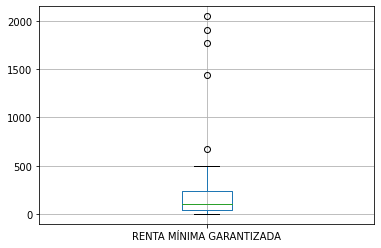

In [191]:
df.boxplot(column='RENTA MÍNIMA GARANTIZADA');    

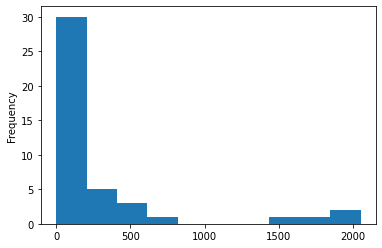

In [192]:
df['RENTA MÍNIMA GARANTIZADA'].plot(kind='hist');

Ahora veamos exclusivamente esos filas con esos posibles outliers para determinar si realmente lo son

Para eso primero calculamos los quantiles que nos mostro el boxplot

In [194]:
Q1 = df['RENTA MÍNIMA GARANTIZADA'].quantile(0.25)
Q3 = df['RENTA MÍNIMA GARANTIZADA'].quantile(0.75)
IQR = Q3 - Q1

Para luego filtrar el df y visualizar cuales son esas filas y a partir de una inspeccion visual, confirmar nosotros mismos si se trata de un outlier o no. 

In [195]:
likely_outliers = df[(df['RENTA MÍNIMA GARANTIZADA'] < Q1-1.5*IQR ) | (df['RENTA MÍNIMA GARANTIZADA'] > Q3+1.5*IQR)]
print(likely_outliers['RENTA MÍNIMA GARANTIZADA'])

13     671.16
23    2049.01
37    1768.48
39    1444.32
41    1904.50
Name: RENTA MÍNIMA GARANTIZADA, dtype: float64


In [196]:
likely_outliers

,Fecha,Fecha entrega,CIA,Ramo,Modalidad,DC,SUC,Agente,Nº Póliza (esp),Nº Póliza (ger),...,MAX RESCATE PARCIAL,SUMA RESCATES,CAP. FALLECIMIENTO FIN MES,CAPITAL MÍNIMO GARANTIZADO,RENTA MÍNIMA GARANTIZADA,POLIZAS_45,Motivo Cancelación AZS,IND_NP,CARTERA_SAP,IND_DIF
13,20210331,20210324,2,2295,166,0,0,9510278,46008040,5224691687,...,0,0.0,49030.68,49000.0,671.16,0,0,0,640,0
23,20210331,20210324,2,2295,166,0,0,9510278,46007577,5224659045,...,0,0.0,98061.37,98000.0,2049.01,0,0,0,640,0
37,20210331,20210324,2,2295,166,0,0,9510278,46007610,5224659090,...,0,0.0,98061.37,98000.0,1768.48,0,0,0,640,0
39,20210331,20210324,2,2295,166,0,0,9510278,46007614,5224662111,...,0,0.0,49030.68,49000.0,1444.32,0,0,0,640,0
41,20210331,20210324,2,2295,166,0,0,9510278,46011147,5224702297,...,0,0.0,98065.38,98000.0,1904.50,0,0,0,640,0


Otra alternativa es realizar obtener estadisticas basica de todo el dataset, para poder visualizar la media, la mediana, cantidad de registros, etc..y en base a eso entender un poco mas el contenido del dataset.

In [205]:
df.describe()

,Fecha,Fecha entrega,CIA,Ramo,Modalidad,DC,SUC,Agente,Nº Póliza (esp),Nº Póliza (ger),...,MAX RESCATE PARCIAL,SUMA RESCATES,CAP. FALLECIMIENTO FIN MES,CAPITAL MÍNIMO GARANTIZADO,RENTA MÍNIMA GARANTIZADA,POLIZAS_45,Motivo Cancelación AZS,IND_NP,CARTERA_SAP,IND_DIF
count,43.0,43.0,43.0,43.0,43.0,43.0,43.0,4.300000e+01,4.300000e+01,4.300000e+01,...,43.0,43.0,43.000000,43.000000,43.000000,43.0,43.0,43.0,43.0,43.0
mean,20210331.0,20210324.0,2.0,2295.0,166.0,0.0,0.0,8.449552e+06,4.600785e+07,5.224664e+09,...,0.0,0.0,38084.635581,38060.465116,286.123256,0.0,0.0,0.0,640.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.853769e+06,2.454242e+03,3.941838e+04,...,0.0,0.0,32660.873161,32640.473995,514.976223,0.0,0.0,0.0,0.0,0.0
min,20210331.0,20210324.0,2.0,2295.0,166.0,0.0,0.0,1.000200e+04,4.599856e+07,5.224578e+09,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,640.0,0.0
25%,20210331.0,20210324.0,2.0,2295.0,166.0,0.0,0.0,9.510278e+06,4.600741e+07,5.224628e+09,...,0.0,0.0,24513.850000,24500.000000,40.530000,0.0,0.0,0.0,640.0,0.0
50%,20210331.0,20210324.0,2.0,2295.0,166.0,0.0,0.0,9.510278e+06,4.600798e+07,5.224691e+09,...,0.0,0.0,24515.340000,24500.000000,100.070000,0.0,0.0,0.0,640.0,0.0
75%,20210331.0,20210324.0,2.0,2295.0,166.0,0.0,0.0,9.510278e+06,4.600806e+07,5.224693e+09,...,0.0,0.0,49030.680000,49000.000000,234.430000,0.0,0.0,0.0,640.0,0.0
max,20210331.0,20210324.0,2.0,2295.0,166.0,0.0,0.0,9.510278e+06,4.601118e+07,5.224704e+09,...,0.0,0.0,98065.380000,98000.000000,2049.010000,0.0,0.0,0.0,640.0,0.0


o de la variable que estamos analizando en este caso:

In [204]:
df['RENTA MÍNIMA GARANTIZADA'].describe()

count      43.000000
mean      286.123256
std       514.976223
min         0.000000
25%        40.530000
50%       100.070000
75%       234.430000
max      2049.010000
Name: RENTA MÍNIMA GARANTIZADA, dtype: float64

o incluso si queremos ver a la vez todas las variables numericas(o un subconjunto de ellas) con boxplots o histograms, con pandas podemos hacer lo siguiente (Pero luego recomendaria analizar cada variable en particular)

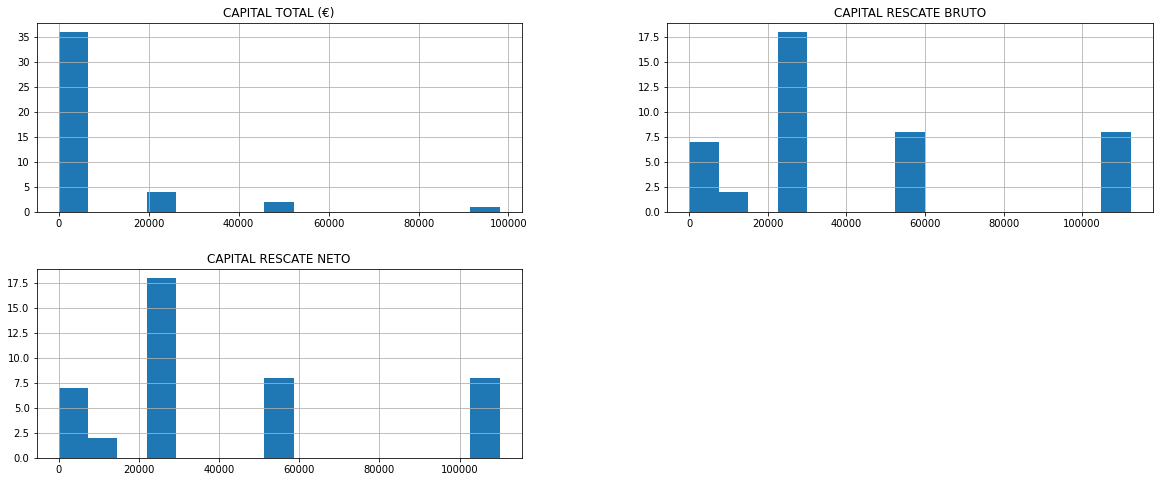

In [239]:
df[['CAPITAL TOTAL (€)', 'CAPITAL RESCATE BRUTO', 'CAPITAL RESCATE NETO']].hist(bins=15, figsize=(20,8));

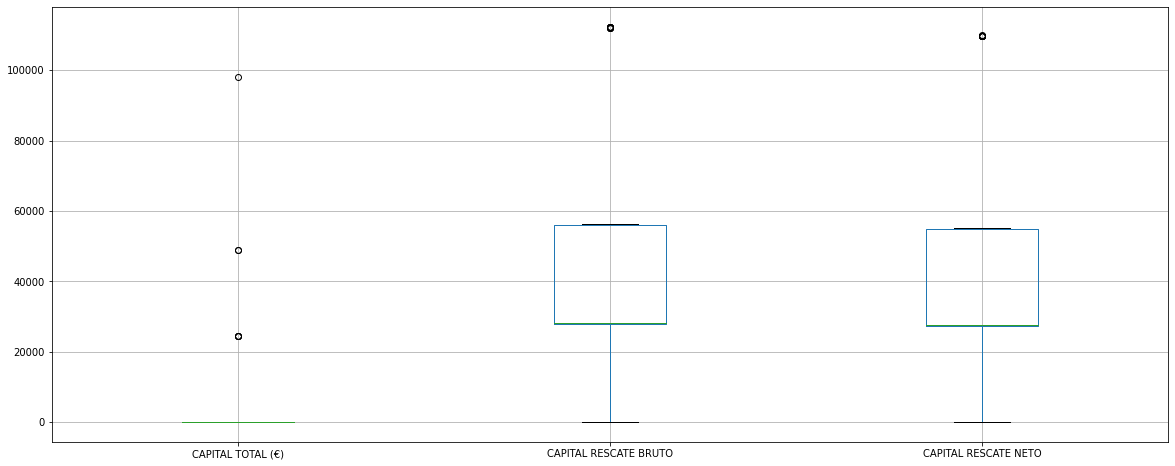

In [250]:
box= df[['CAPITAL TOTAL (€)', 'CAPITAL RESCATE BRUTO', 'CAPITAL RESCATE NETO']].boxplot(grid=True, rot=0, fontsize=10,  figsize=(20,8))

## Analisis Variables Cualitativas (o Categoricas)

Dado que para variables categoricas no podemos usar boxplot, ya que no es posible distribuir categorias, lo que debemos hacer como alternativa es contabilizar registros por cada valor de la categoria y analizar los valores mas frecuentos o menos frecuentes para entender si se tratan de valores missing, erroneos o outliers.

Podemos visualizar la distribucion de los datos de cada categoria con un simple pie como vemos aqui:

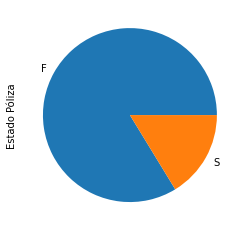

In [181]:
df['Estado Póliza'].value_counts().plot(kind='pie');

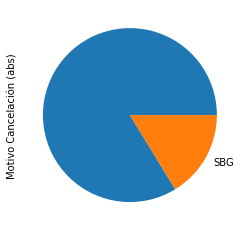

In [182]:
df['Motivo Cancelación (abs)'].value_counts().plot(kind='pie');

O en graficos de barras clasicos

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


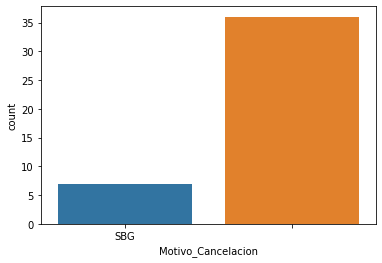

In [292]:
import seaborn as sns
import matplotlib as plt

df.rename(columns={'Estado Póliza': 'Estado_Poliza',  'Motivo Cancelación (abs)': 'Motivo_Cancelacion'}, inplace=True)
categorical= ['Estado_Poliza','Motivo_Cancelacion']
for i in a:
    print(sns.countplot(x=df[i]));

In [293]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

AttributeError: module 'matplotlib' has no attribute 'subplots'

References:
- Perform EDA: https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
- Detecting Outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- Boxplots & Histograms: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
